# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1. After looking at the dataset, I see alot values in the range of 100-199 so I predict about 25% of the values will be starting with 1 and approximately 8% will by starting with 9 (giving an equal chance as other digits except 1).

2. My prediction is that 10% of the values might have 1 as their last digit. Similarly, I predict 10% of values might have 9 as the last digit. Giving each digit and equal chance of being the last digit of a value.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.
import pandas as pd
df = pd.read_csv("sp500.csv")
df.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


The unit of observation would be the "Name" because each company name/symbol represents a specific compnay. Hence, to find the open and close values of a specific comany, by indexing the 'name' it will be easier to locate them.

In [2]:
#Setting "Name" as the index
df_by_name = df.set_index("Name")
print(df_by_name)
#df_by_name.head()


            date     open    close    volume
Name                                        
AAL   2018-02-01   $54.00   $53.88   3623078
AAPL  2018-02-01  $167.16  $167.78  47230787
AAP   2018-02-01  $116.24  $117.29    760629
ABBV  2018-02-01  $112.24  $116.34   9943452
ABC   2018-02-01   $97.74   $99.29   2786798
...          ...      ...      ...       ...
XYL   2018-02-01   $72.50   $74.84   1817612
YUM   2018-02-01   $84.24   $83.98   1685275
ZBH   2018-02-01  $126.35  $128.19   1756300
ZION  2018-02-01   $53.79   $54.98   3542047
ZTS   2018-02-01   $76.84   $77.82   2982259

[505 rows x 4 columns]


## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

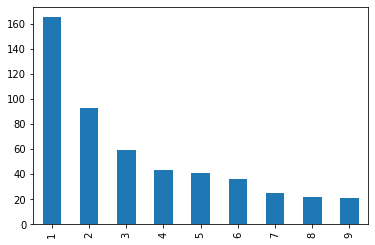

In [3]:
# ENTER YOUR CODE HERE.
df.volume = df.volume.apply(str)
first_digits = df.volume.str[0]
first_digits.value_counts()

import matplotlib 
%matplotlib inline

df_first = first_digits.value_counts()
df_first.plot.bar()

In general terms, my prediction in question 0 conforms to these results as I had predicted that values starting with 1 will be more than the other digits as the values starting digit. However, the percentage value I predicted might not be exactly accurate.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

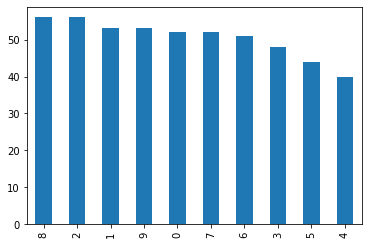

In [4]:
# ENTER YOUR CODE HERE.
df.volume = df.volume.apply(str)
last_digits = df.volume.str[-1]
last_digits.value_counts()

import matplotlib 
%matplotlib inline

df_last = last_digits.value_counts()
df_last.plot.bar()


My prediction in question 0 was close to the actual result, however, not entirely same. Most of the digits have an approximately an equal chance of being the last digit.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    171
2     55
3     52
6     48
4     43
7     43
5     39
8     28
9     26
Name: close, dtype: int64


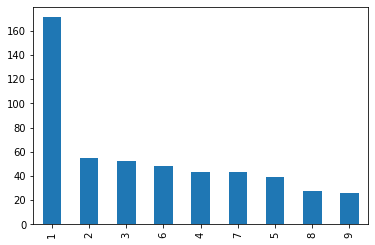

In [5]:
# ENTER YOUR CODE HERE.
df.close = df.close.apply(str)
df.close = df.close.str.strip("$")
first_digits = df.close.str[0]
cnt = first_digits.value_counts()
print(cnt)

import matplotlib
%matplotlib inline

df_close_first = first_digits.value_counts()
df_close_first.plot.bar()

The panda initially referred the dtype as "object" because the column had the "$" symbol. Therefore, we had to clean the data in order for the pandas to convert the variable to a quantitative type.

We can observe from the bar plot that indeed the digit distribution was not a fluke. Therefore, after looking at the "close" variable we can conclude that the digit distribution does hold as we compare the bar plots from question 2 and this question. There is not alot of difference between the two plots.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF to iLearn. 
4. Have the TA check your lab to obtain credit. 